In [89]:
import numpy as np
import pandas as pd
import os

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes = True) # adds a nice color background to the graph

In [15]:
# Read the file 
fever = pd.read_csv('Fever.csv')
fever.head()

A  B  Volunteer  Relief
0  1  1          1     2.4
1  1  1          2     2.7
2  1  1          3     2.3
3  1  1          4     2.5
4  1  2          1     4.6

In [317]:
mean_relief = fever['Relief'].mean()
mean_relief

7.183333333333333

In [4]:
# Check for the datatypes and null values
fever.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          36 non-null     int64  
 1   B          36 non-null     int64  
 2   Volunteer  36 non-null     int64  
 3   Relief     36 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [16]:
# Calculate the number of 'A' and 'B' compound in the database
a = fever['A'].value_counts()
b = fever['B'].value_counts()


In [20]:
print('The number of trials with A ingredient are:','\n',a)
print('The number of trials with B ingredient are:','\n',b)


The number of trials with A ingredient are: 
 3    12
2    12
1    12
Name: A, dtype: int64
The number of trials with B ingredient are: 
 3    12
2    12
1    12
Name: B, dtype: int64


In [22]:
# Convert the Continous data into Categorical data

fever['A'] = pd.Categorical(fever['A'])
fever['B'] = pd.Categorical(fever['B'])
fever['Volunteer'] = pd.Categorical(fever['Volunteer'])
fever.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   A          36 non-null     category
 1   B          36 non-null     category
 2   Volunteer  36 non-null     category
 3   Relief     36 non-null     float64 
dtypes: category(3), float64(1)
memory usage: 924.0 bytes


### 1.1

In [27]:
# Let's groupby the Volunteers with mean of Relief hours. Derive the answer to the first question here
relief_vol = fever[['Volunteer','Relief']].groupby('Volunteer').mean().round(2)
relief_vol

Relief
Volunteer        
1            7.23
2            7.13
3            7.14
4            7.22

In [29]:
relief_A = fever[['A','Relief']].groupby('A').mean().round(2)
relief_A

Relief
A        
1    3.88
2    7.83
3    9.83

In [30]:
relief_B = fever[['B','Relief']].groupby('B').mean().round(2)
relief_B

Relief
B        
1    4.63
2    7.93
3    8.98

In [37]:
relief_A.to_csv('Grouped-A.csv')
relief_B.to_csv('Grouped-B.csv')
relief_vol.to_csv('Grouped-V.csv')

In [441]:
# Just checking the means for various Volunteers
relief = fever[['Volunteer','Relief']].groupby('Volunteer').mean().round(2)
relief

Relief
Volunteer        
1            7.23
2            7.13
3            7.14
4            7.22

### 1.2

In [39]:
# Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’.
from statsmodels.formula.api import ols # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance, anova_lm # For n-way ANOVA


### Hypothesis
#### H0 => The mean relief hours with respect to each trial including compound A are equal
#### Ha => At least one of the means of relief hours with respect to each trial of compound A are unequal


In [272]:
relief_A # Mean relief in hours

Relief
A        
1    3.88
2    7.83
3    9.83

In [271]:
formula_A = 'Relief ~ A'
model_A = ols(formula_A, fever).fit()
anova_A = anova_lm(model_A)
anova_A

df  sum_sq     mean_sq          F        PR(>F)
A          2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN

In [279]:
print(' Since the P-Value is < 0.05, we  reject the Ho.')

 Since the P-Value is < 0.05, we  reject the Ho.


### 1.3

In [274]:
relief_B # Mean relief in hours

Relief
B        
1    4.63
2    7.93
3    8.98

### Hypothesis
#### H0 => The mean relief hours with respect to each trial including compound B are equal
#### Ha => At least one of the means of relief hours with respect to each trial of compound B are unequal


In [265]:
# Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’.
formula_B = 'Relief ~ B'
model_B = ols(formula_B, fever).fit()
anova_B = anova_lm(model_B)
anova_B

df  sum_sq    mean_sq         F   PR(>F)
B          2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN

In [276]:
print(' Since the P-Value < 0.05, we reject the Ho.')

 Since the P-Value < 0.05, we reject the Ho.


### 1.4

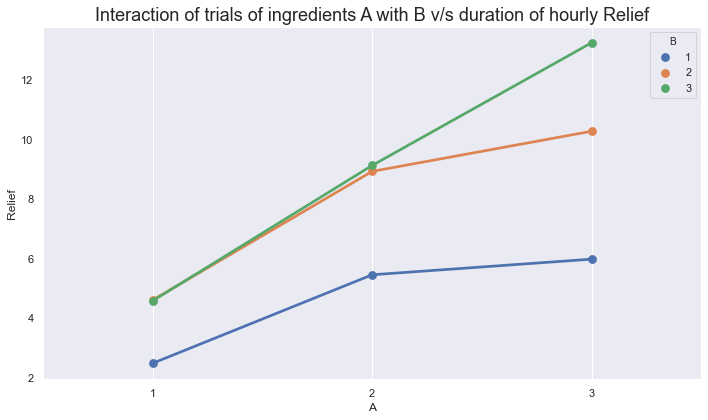

In [25]:
figure, ax = plt.subplots()
figure.set_size_inches(10, 6)

a = sns.pointplot(x = 'A', y = 'Relief', hue = 'B', data = fever,   ci = None)
plt.title('Interaction of trials of ingredients A with B v/s duration of hourly Relief', fontsize = 18)

plt.tight_layout()
plt.grid()
plt.show()

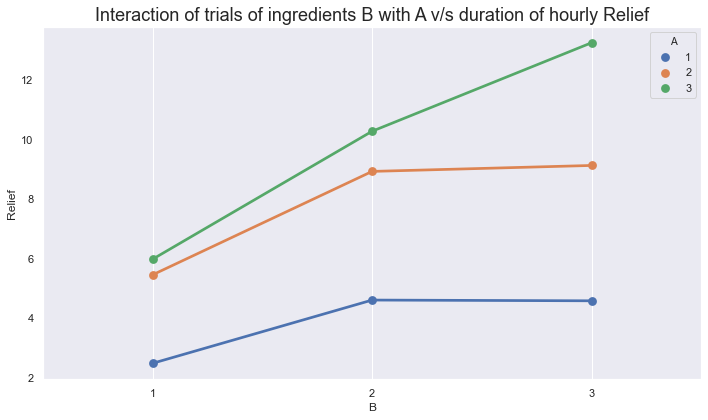

In [24]:
figure, ax = plt.subplots()
figure.set_size_inches(10, 6)

a = sns.pointplot(x = 'B', y = 'Relief', hue = 'A', data = fever,   ci = None)
plt.title('Interaction of trials of ingredients B with A v/s duration of hourly Relief', fontsize = 18)

plt.tight_layout()
plt.grid()
plt.show()

### 1.5

In [260]:
# Anova for Volunteer & A 
formula_AV = 'Relief ~ Volunteer * A'
model_AV = ols(formula_AV, fever).fit()
aov_AV = anova_lm(model_AV)
aov_AV

df      sum_sq     mean_sq          F    PR(>F)
Volunteer     3.0    0.072222    0.024074   0.003741  0.999675
A             2.0  220.020000  110.010000  17.094833  0.000024
Volunteer:A   6.0    0.191111    0.031852   0.004950  0.999999
Residual     24.0  154.446667    6.435278        NaN       NaN

In [288]:
# Anova for Volunteer & B
formula_BV = 'Relief ~ Volunteer * B'
model_BV = ols(formula_BV, fever).fit()
aov_BV = anova_lm(model_BV)
aov_BV

df      sum_sq    mean_sq         F    PR(>F)
Volunteer     3.0    0.072222   0.024074  0.002305  0.999843
B             2.0  123.660000  61.830000  5.919894  0.008131
Volunteer:B   6.0    0.331111   0.055185  0.005284  0.999999
Residual     24.0  250.666667  10.444444       NaN       NaN

In [293]:
# Perform N-way Anova with Relief as a function of A and B
formula_AB = 'Relief ~ A * B'
model_AB = ols(formula_AB, fever).fit()
aov_AB = anova_lm(model_AB)
aov_AB

df   sum_sq     mean_sq            F        PR(>F)
A          2.0  220.020  110.010000  1827.858462  1.514043e-29
B          2.0  123.660   61.830000  1027.329231  3.348751e-26
A:B        4.0   29.425    7.356250   122.226923  6.972083e-17
Residual  27.0    1.625    0.060185          NaN           NaN

## 1.6

In [294]:
# One-way Anova for Relief ~ Volunteer 
formula_V = 'Relief ~ Volunteer'
model_V = ols(formula_V, fever).fit()
aov_V = anova_lm(model_V)
aov_V

df      sum_sq    mean_sq         F    PR(>F)
Volunteer   3.0    0.072222   0.024074  0.002056  0.999868
Residual   32.0  374.657778  11.708056       NaN       NaN

#### The statistical significance of Relief as a function of Volunteers is not statistically significant to explain 

In [281]:
# N-way Anova for Relief ~ Volunteer OR ( A & B ) 
formula_ABV = 'Relief ~ Volunteer + A * B'
model_ABV = ols(formula_ABV, fever).fit()
aov_ABV = anova_lm(model_ABV)
aov_ABV

df      sum_sq     mean_sq            F        PR(>F)
Volunteer   3.0    0.072222    0.024074     0.372093  7.738510e-01
A           2.0  220.020000  110.010000  1700.333453  1.403185e-26
B           2.0  123.660000   61.830000   955.655098  1.322903e-23
A:B         4.0   29.425000    7.356250   113.699463  3.119446e-15
Residual   24.0    1.552778    0.064699          NaN           NaN

#### The statistical significance of Relief as a function of Volunteer OR (A & B) is statistically significant

# Part 2

In [91]:
college = pd.read_csv('Education.csv')

In [303]:
# Check for null and datatypes 
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

##### No null values

#### Get the dimensions of the data

In [304]:
college.shape

(777, 18)

## Summary

In [38]:
college.describe().T


count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

In [42]:
# Coff of variance: For univariate analysis
cofv = college.describe().T
cofv['Coff of variance'] = cofv['std']/cofv['mean']
cofv


count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  Coff of variance  
Apps          3624.0  48094.0          1.289363  
Accept        2424.0  26330.0          1.214141  
Enroll         902.0   6392.0          1.191293  
Top10perc       35.0     96.0          0.640105  
Top25perc       69.0    100.0          0.354946  
F.Undergrad   4005.0  31643.0          1.310957  
P.Undergrad    967.0  21836.0          1.780000  
Outstate     12925.0  21700.0          0.385322  
Room.Board    5050.0   8124.0          0.251679  
Books          600.0   2340.0          0.300530  
Personal      1700.0   6800.0          0.505035  
PhD             85.0    103.0          0.224719  
Terminal        92.0    100.0          0.184716  
S.F.Ratio       16.5     39.8          0.280939  
perc.alumni     31.0     64.0          0.544841  
Expend       10830.0  56233.0          0.540546  
Grad.Rate       78.0    118.0          0.262402

In [2]:
# Drop the Name column (dtype = Object) and create a new df
col = college.drop(['Names'], axis =1)

NameError: name 'college' is not defined

In [6]:
col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Apps         777 non-null    int64  
 1   Accept       777 non-null    int64  
 2   Enroll       777 non-null    int64  
 3   Top10perc    777 non-null    int64  
 4   Top25perc    777 non-null    int64  
 5   F.Undergrad  777 non-null    int64  
 6   P.Undergrad  777 non-null    int64  
 7   Outstate     777 non-null    int64  
 8   Room.Board   777 non-null    int64  
 9   Books        777 non-null    int64  
 10  Personal     777 non-null    int64  
 11  PhD          777 non-null    int64  
 12  Terminal     777 non-null    int64  
 13  S.F.Ratio    777 non-null    float64
 14  perc.alumni  777 non-null    int64  
 15  Expend       777 non-null    int64  
 16  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16)
memory usage: 103.3 KB


In [326]:
new_df = pd.read_csv('Education.csv')
col['S.F.Ratio'] = new_df['S.F.Ratio']

In [325]:
new_df['S.F.Ratio'].describe()

count    777.000000
mean      14.089704
std        3.958349
min        2.500000
25%       11.500000
50%       13.600000
75%       16.500000
max       39.800000
Name: S.F.Ratio, dtype: float64

## 2.1.1 Univariate Analysis

###  Profile of College Applications recieved

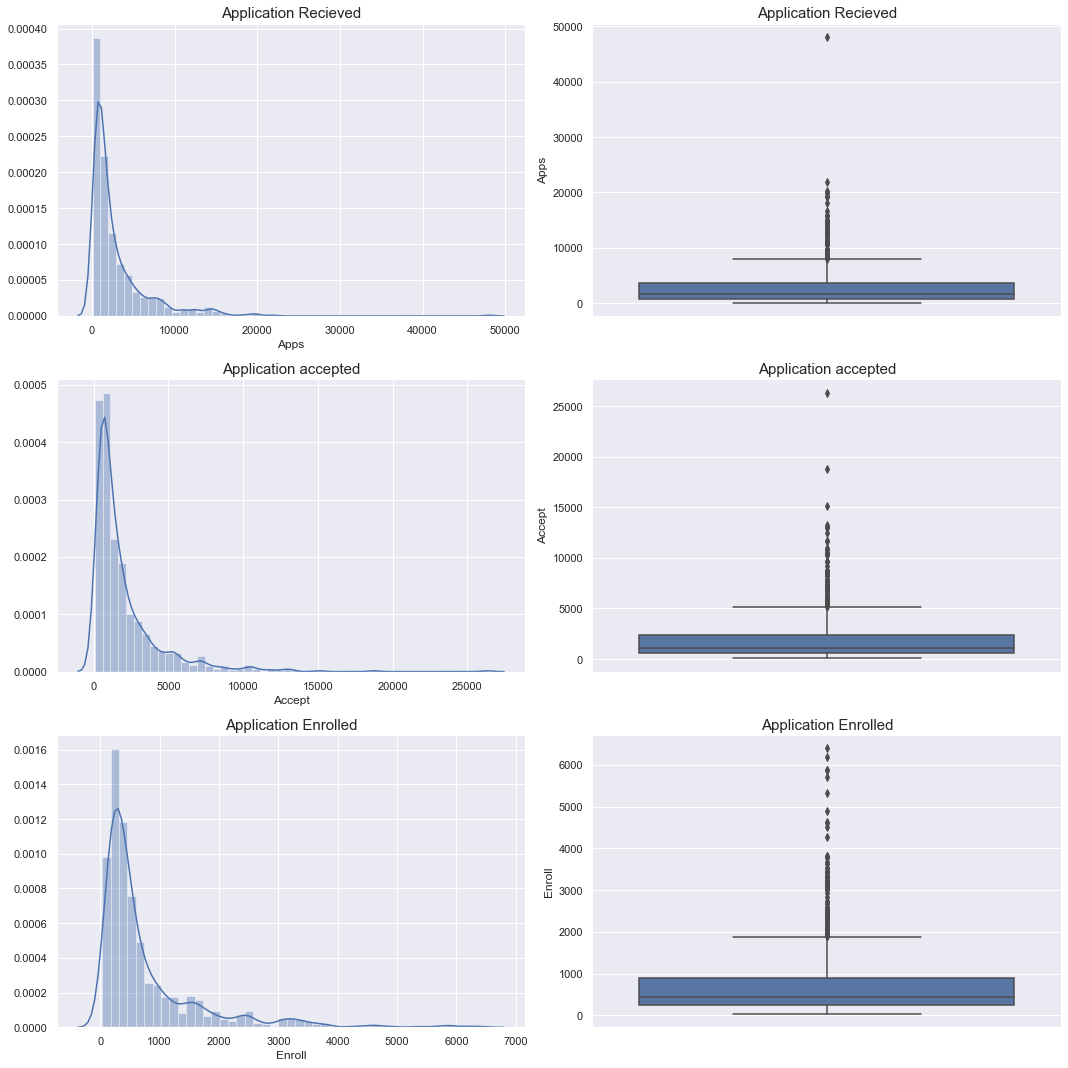

In [31]:

figure, axis = plt.subplots(3,2)
figure.set_size_inches(15,15)

# No of Applications
a = sns.distplot(col['Apps'], ax = axis[0][0])
a.set_title('Application Recieved', fontsize = 15)
a = sns.boxplot(col['Apps'], orient = 'v', ax = axis[0][1])
a.set_title('Application Recieved', fontsize = 15)

# Applications accepted
a = sns.distplot(col['Accept'], ax = axis[1][0])
a.set_title('Application accepted', fontsize = 15)
a = sns.boxplot(col['Accept'], orient = 'v', ax = axis[1][1])
a.set_title('Application accepted', fontsize = 15)

# Students Enrolled
a = sns.distplot(col['Enroll'], ax = axis[2][0])
a.set_title('Application Enrolled', fontsize = 15)
a = sns.boxplot(col['Enroll'], orient = 'v', ax = axis[2][1])
a.set_title('Application Enrolled', fontsize = 15)

# Top 10 percentage 


plt.tight_layout()
plt.show()

### Profile of aspiring College Students 

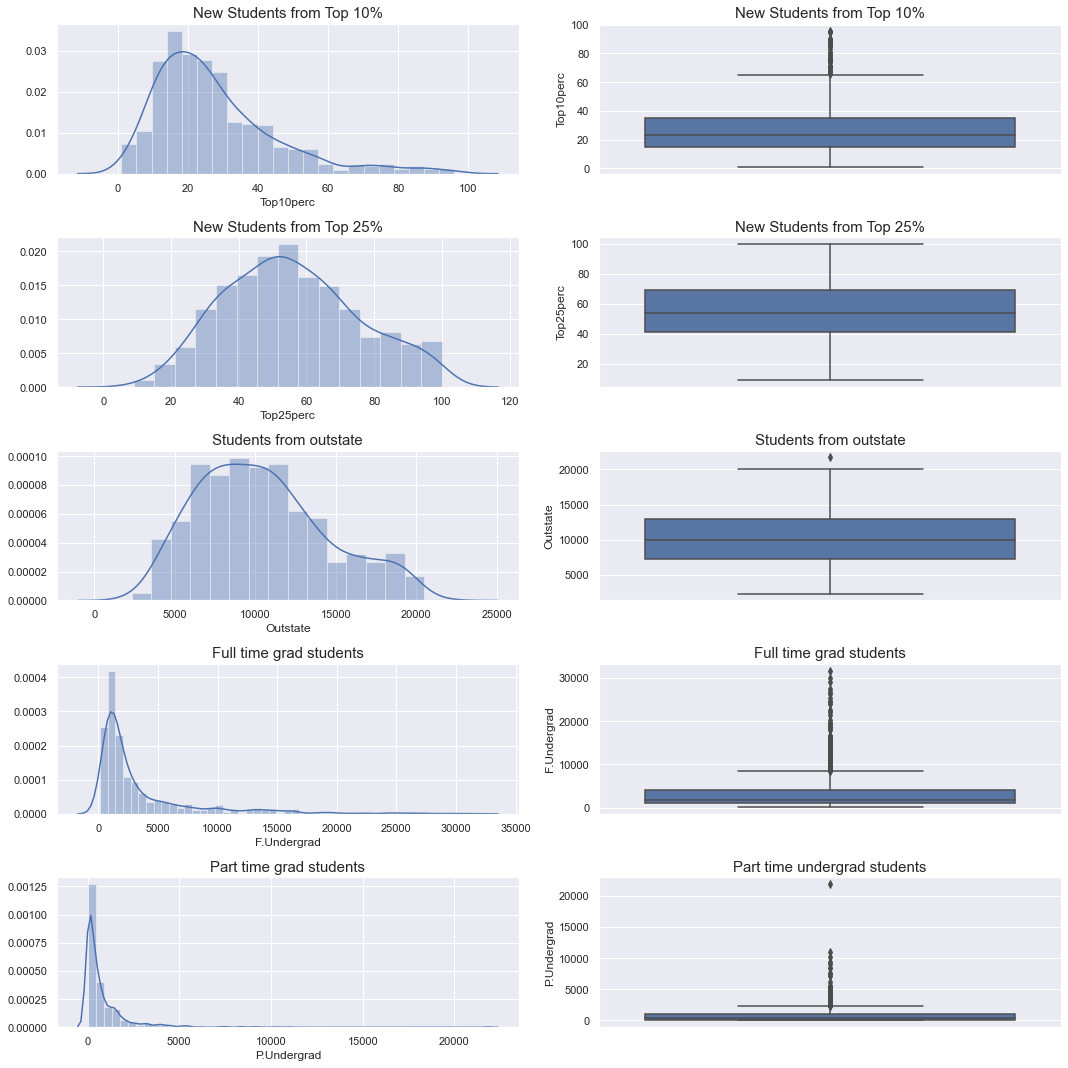

In [43]:
figure, axis = plt.subplots(5,2)
figure.set_size_inches(15,15)

# Students from top 10% high schools
b = sns.distplot(col['Top10perc'], ax = axis[0][0])
b.set_title('New Students from Top 10%', fontsize = 15)
b = sns.boxplot(col['Top10perc'], orient = 'v', ax = axis[0][1])
b.set_title('New Students from Top 10%', fontsize = 15)

# Students from top 25% high schools
b = sns.distplot(col['Top25perc'], ax = axis[1][0])
b.set_title('New Students from Top 25%', fontsize = 15)
b = sns.boxplot(col['Top25perc'], orient = 'v', ax = axis[1][1])
b.set_title('New Students from Top 25%', fontsize = 15)

# Students from outstate 
b = sns.distplot(col['Outstate'], ax= axis[2][0])
b.set_title('Students from outstate', fontsize = 15)
b = sns.boxplot(col['Outstate'],orient = 'v', ax = axis[2][1])
b.set_title('Students from outstate', fontsize = 15)

# Full time Undergrad Students
b = sns.distplot(col['F.Undergrad'], ax = axis[3][0])
b.set_title('Full time grad students', fontsize = 15)
b = sns.boxplot(col['F.Undergrad'], orient = 'v', ax = axis[3][1])
b.set_title('Full time grad students', fontsize = 15)

# Part time undergrad students
b = sns.distplot(col['P.Undergrad'], ax= axis[4][0])
b.set_title('Part time grad students', fontsize = 15)
b = sns.boxplot(col['P.Undergrad'],orient = 'v',ax = axis[4][1])
b.set_title('Part time undergrad students', fontsize = 15)



plt.tight_layout()
plt.show()

## Profile: Cost 

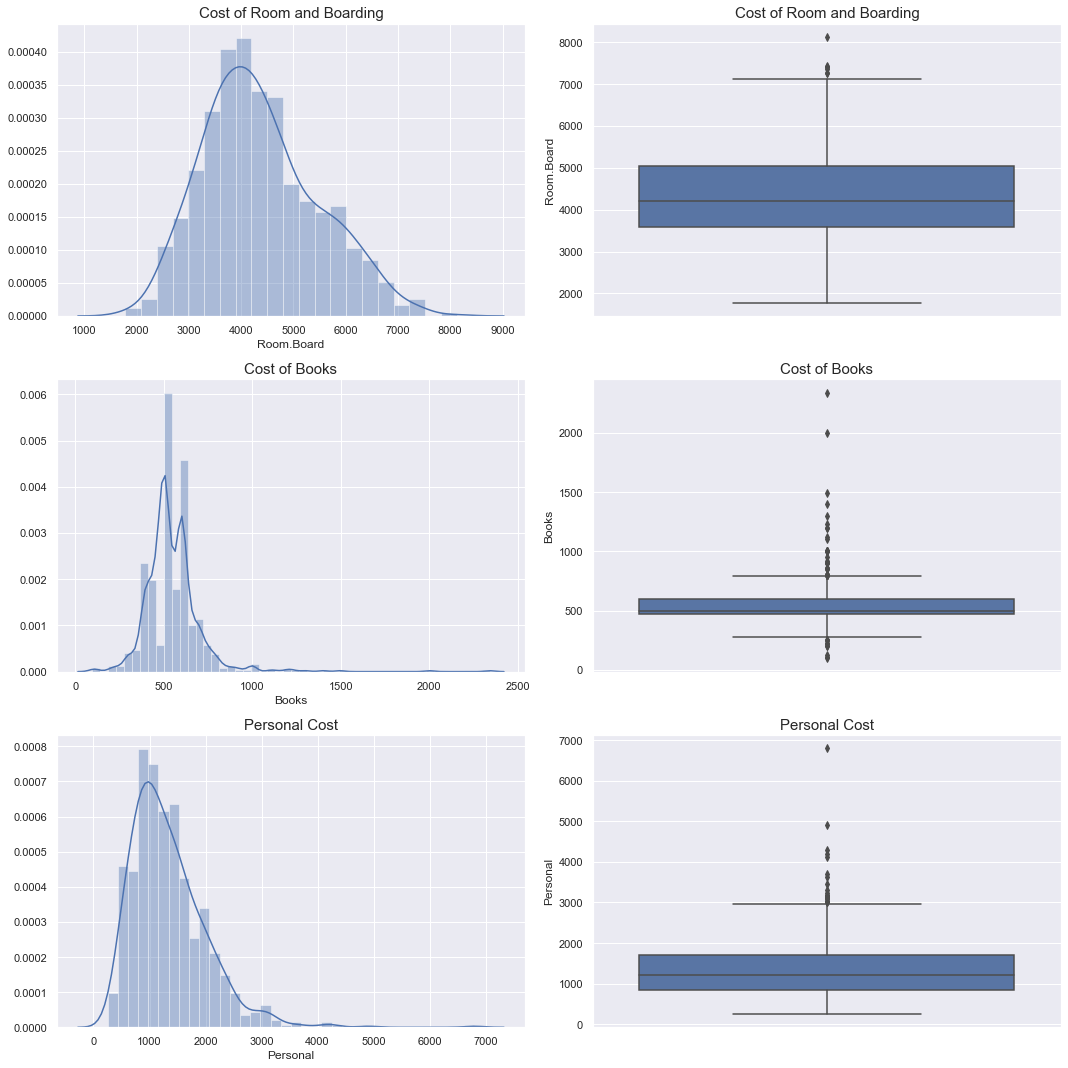

In [354]:
figure, axis = plt.subplots(3,2)
figure.set_size_inches(15,15)

# Cost of Room and Boarding
c = sns.distplot(col['Room.Board'], ax = axis[0][0])
c.set_title('Cost of Room and Boarding',  fontsize = 15)
c = sns.boxplot(col['Room.Board'],orient = 'v', ax = axis[0][1])
c.set_title('Cost of Room and Boarding',  fontsize = 15)

# Cost of Books
c = sns.distplot(col['Books'], ax = axis[1][0])
c.set_title('Cost of Books',  fontsize = 15)
c = sns.boxplot(col['Books'],orient = 'v', ax = axis[1][1])
c.set_title('Cost of Books',  fontsize = 15)

# Personal Cost
c = sns.distplot(col['Personal'], ax = axis[2][0])
c.set_title('Personal Cost',  fontsize = 15)
c = sns.boxplot(col['Personal'],orient = 'v', ax = axis[2][1])
c.set_title('Personal Cost',  fontsize = 15)


plt.tight_layout()
plt.show()

## Profile: College Faculty and Alumni

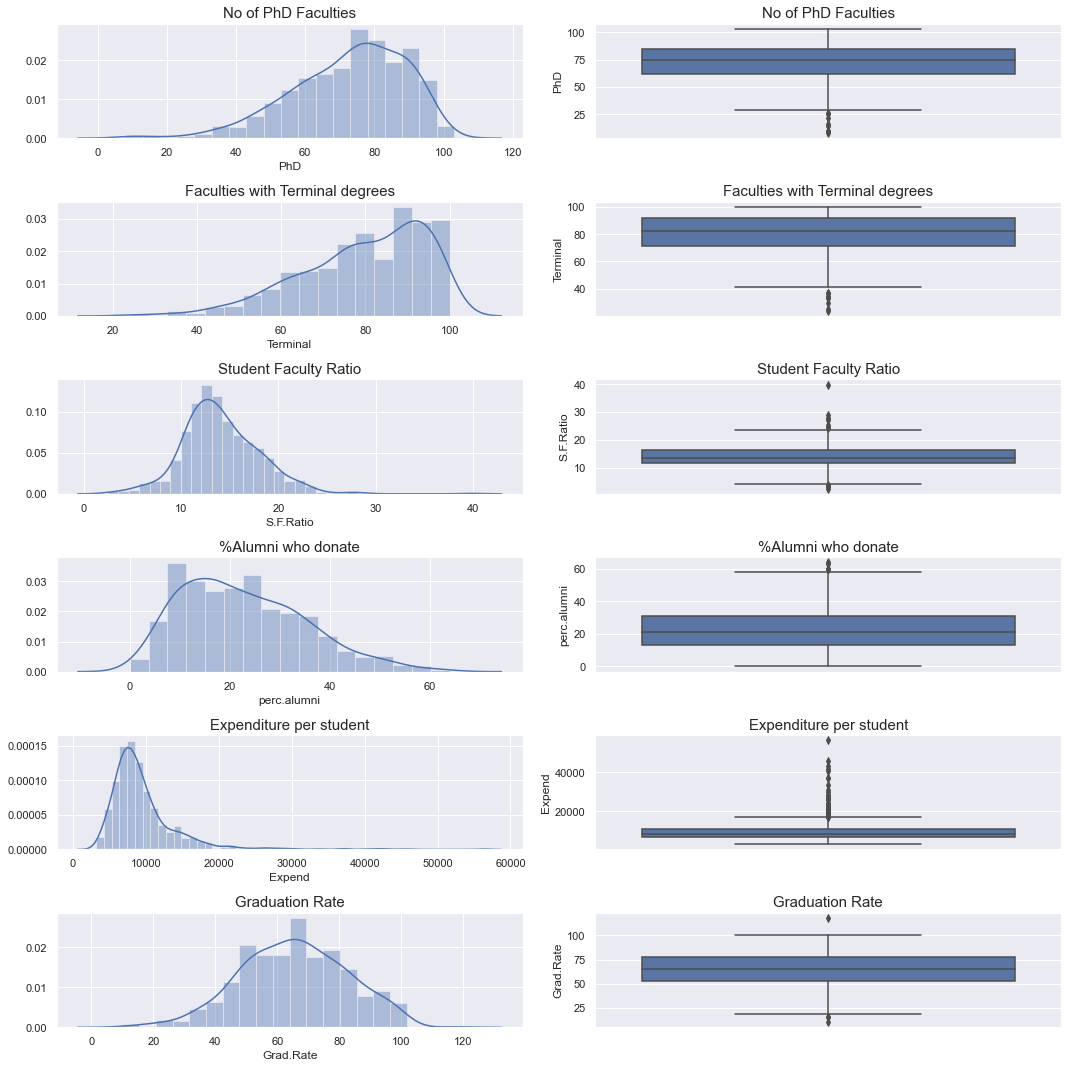

In [376]:
figure, axis = plt.subplots(6,2)
figure.set_size_inches(15,15)

# Faculties with PhDs
d = sns.distplot(col['PhD'], ax = axis[0][0])
d.set_title('No of PhD Faculties', fontsize = 15)
d = sns.boxplot(col['PhD'], orient = 'v', ax = axis[0][1])
d.set_title('No of PhD Faculties', fontsize = 15)

# Terminal degrees 
d = sns.distplot(col['Terminal'], ax = axis[1][0])
d.set_title('Faculties with Terminal degrees', fontsize = 15)
d = sns.boxplot( col['Terminal'], orient = 'v', ax = axis[1][1])
d.set_title('Faculties with Terminal degrees', fontsize = 15)

# Student Faculty Ratio
d = sns.distplot(col['S.F.Ratio'], ax = axis[2][0])
d.set_title('Student Faculty Ratio', fontsize = 15)
d = sns.boxplot( col['S.F.Ratio'], orient = 'v', ax = axis[2][1])
d.set_title('Student Faculty Ratio', fontsize = 15)

# %Alumni who donate
d = sns.distplot(col['perc.alumni'], ax = axis[3][0])
d.set_title('%Alumni who donate', fontsize = 15)
d = sns.boxplot( col['perc.alumni'], orient = 'v', ax = axis[3][1])
d.set_title('%Alumni who donate', fontsize = 15)

# Expenditure per student
d = sns.distplot(col['Expend'], ax = axis[4][0])
d.set_title('Expenditure per student', fontsize = 15)
d = sns.boxplot( col['Expend'], orient = 'v', ax = axis[4][1])
d.set_title('Expenditure per student', fontsize = 15)

# Graduation Rate
d = sns.distplot(col['Grad.Rate'], ax = axis[5][0])
d.set_title('Graduation Rate', fontsize = 15)
d = sns.boxplot( col['Grad.Rate'], orient = 'v', ax = axis[5][1])
d.set_title('Graduation Rate', fontsize = 15)


plt.tight_layout()
plt.show()

## Multi-variate Analysis

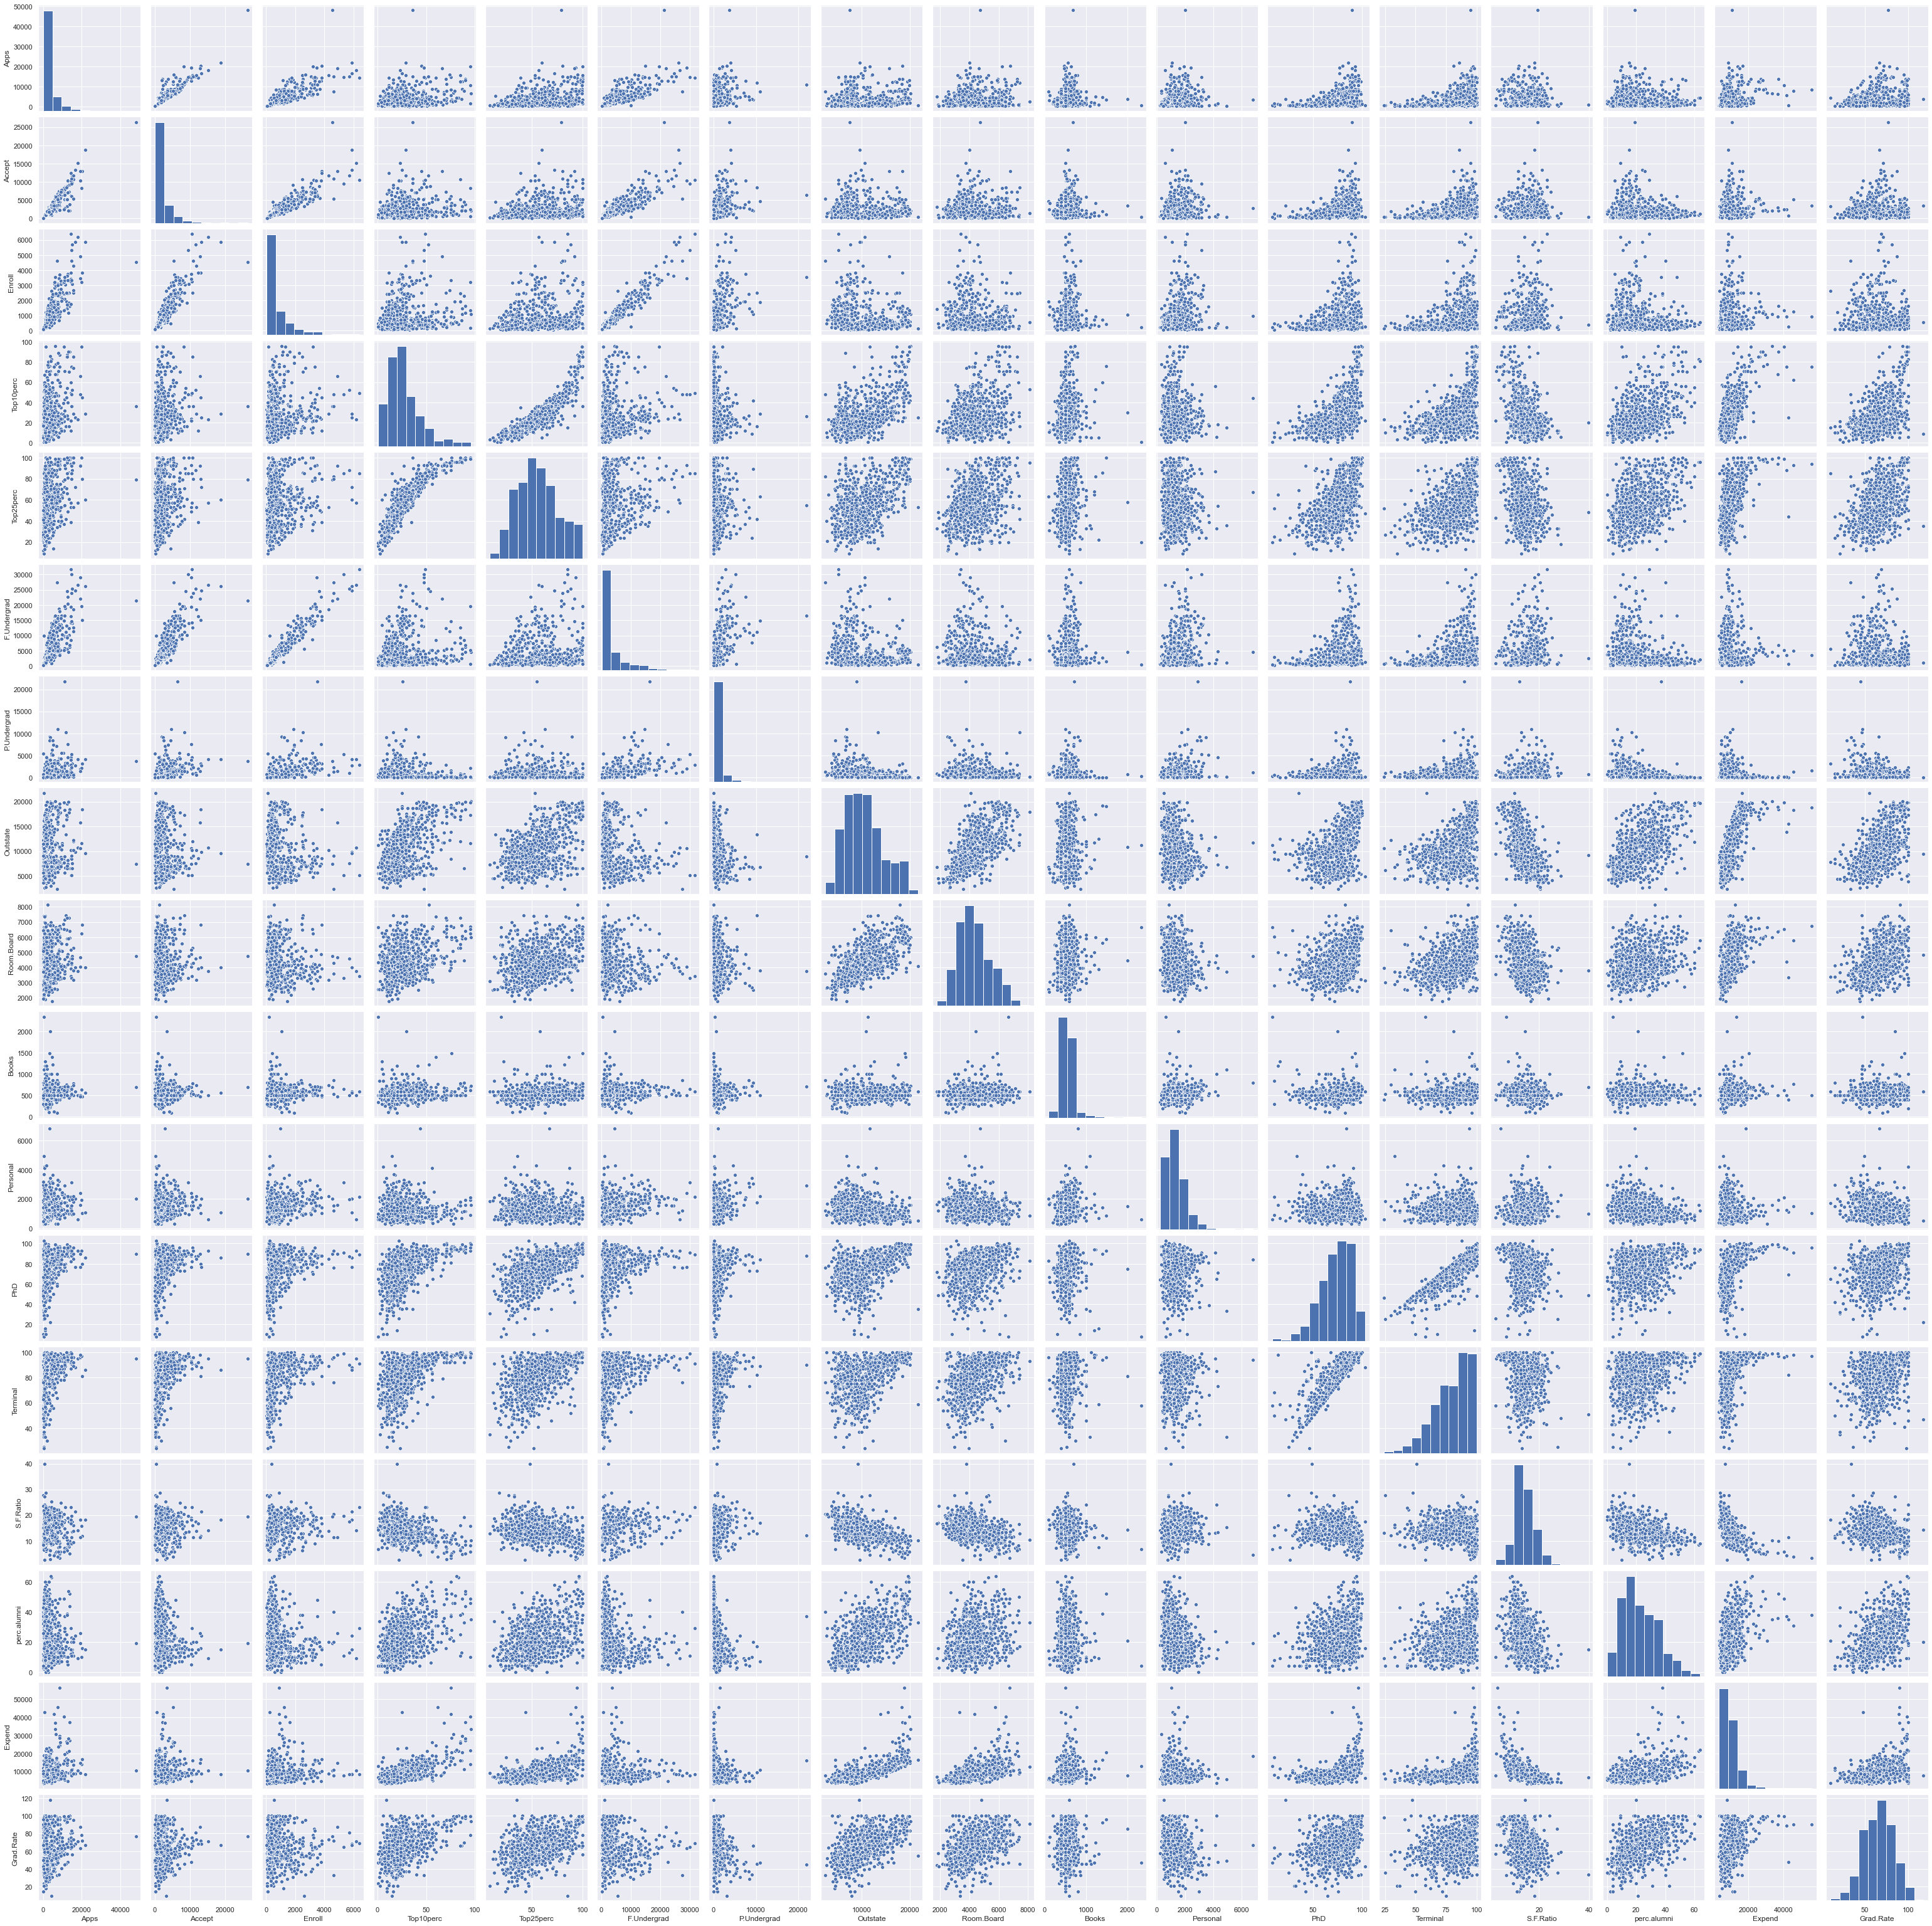

In [377]:
sns.pairplot(col)

<AxesSubplot:>

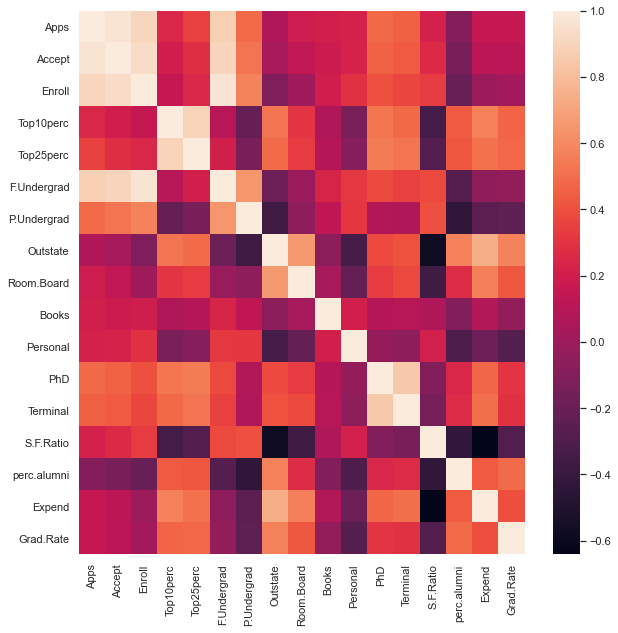

In [411]:
# Calculate Correlation
corr = col.corr()

#Plot the Heatmap
plt.subplots(figsize=(10,10))
sns.heatmap(col.corr())

## 2.2

Text(0.5, 1.0, 'Pre Scaling')

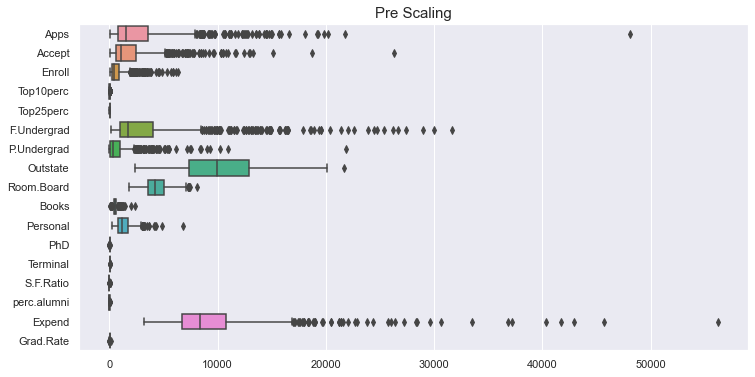

In [127]:
# Plotting boxplots to compare the Pre and Post Scaling database 
plt.figure(figsize=(12,6))
a = sns.boxplot( data = col, orient = 'h')
a.set_title('Pre Scaling', fontsize = 15)

In [131]:
# Remove extreme Outliers : Apps
col['Apps'].describe()

count      777.000000
mean      3001.638353
std       3870.201484
min         81.000000
25%        776.000000
50%       1558.000000
75%       3624.000000
max      48094.000000
Name: Apps, dtype: float64

In [412]:
# Adjust for the outliers

# Lets change the values of Apps more than 75%ile with 80th %tile value
col['Apps'] = np.where(col['Apps']>col['Apps'].quantile(0.80), col['Apps'].quantile(0.80), col['Apps'])

# Remove extreme Outliers : Accept
col['Accept'] = np.where(col['Accept']>col['Accept'].quantile(0.80),col['Accept'].quantile(0.80), col['Accept'])

# Remove extreme Outliers : Enroll
col['Enroll'] = np.where(col['Enroll']>col['Enroll'].quantile(0.80),col['Enroll'].quantile(0.80), col['Enroll'])

# Remove extreme Outliers : Top10perc
col['Top10perc'] = np.where(col['Top10perc']>col['Top10perc'].quantile(0.80),col['Top10perc'].quantile(0.80), col['Top10perc'])

# Remove extreme Outliers : P.Undergrad
col['P.Undergrad'] = np.where(col['P.Undergrad']>col['P.Undergrad'].quantile(0.80),col['P.Undergrad'].quantile(0.80), col['P.Undergrad'])

# Remove extreme Outliers : F.Undergrad
col['F.Undergrad'] = np.where(col['F.Undergrad']>col['F.Undergrad'].quantile(0.80),col['F.Undergrad'].quantile(0.80), col['F.Undergrad'])

# Remove extreme positive Outliers : Books
col['Books'] = np.where(col['Books']>col['Books'].quantile(0.80),col['Books'].quantile(0.80), col['Books'])

# Remove extreme negative Outliers : Books
col['Books'] = np.where(col['Books']<col['Books'].quantile(0.16),col['Books'].quantile(0.16), col['Books'])

# Remove extreme Outliers : Personal
col['Personal'] = np.where(col['Personal']>col['Personal'].quantile(0.80),col['Personal'].quantile(0.80), col['Personal'])

# Remove extreme Outliers : Expend
col['Expend'] = np.where(col['Expend']>col['Expend'].quantile(0.80),col['Expend'].quantile(0.80), col['Expend'])

# Remove extreme negative Outliers : S.F.Ratio
col['S.F.Ratio'] = np.where(col['S.F.Ratio']<col['S.F.Ratio'].quantile(0.10),col['S.F.Ratio'].quantile(0.10), col['S.F.Ratio'])

# Remove extreme positive Outliers : S.F.Ratio
col['S.F.Ratio'] = np.where(col['S.F.Ratio']>col['S.F.Ratio'].quantile(0.80),col['S.F.Ratio'].quantile(0.80), col['S.F.Ratio'])

In [418]:
# Check for outliers for PhD
PhD = col[col['PhD']<62]
PhD

Terminal = col[col['Terminal']<71]
Terminal

print('The number of left side outliers for variables (PhD and Terminal) respectively are:', len(PhD), len(Terminal))

The number of left side outliers for variables (PhD and Terminal) respectively are: 181 192


In [419]:
# Remove extreme negative Outliers : PhD and Terminal
col['PhD'] = np.where(col['PhD']<col['PhD'].quantile(0.10),col['PhD'].quantile(0.10), col['PhD'])
col['Terminal'] = np.where(col['Terminal']<col['Terminal'].quantile(0.10),col['Terminal'].quantile(0.10), col['Terminal'])


In [420]:
col.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   2079.196252  1516.113298    81.0   776.0  1558.0   
Accept       777.0   1439.819768   958.973711    72.0   604.0  1110.0   
Enroll       777.0    544.593514   357.671046    35.0   242.0   434.0   
Top10perc    777.0     24.163449    10.838924     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   2427.301673  1767.671323   139.0   992.0  1707.0   
P.Undergrad  777.0    528.953822   478.605641     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    543.773807    64.732158   450.0   500.0   550.0   
Personal     777.0   1226.384402   440.113798   250.0   850.0  1200.0   
PhD          777.0     73.714028    14.071666    50.6    62.0    75.0   
Terminal     777.0     80.599743    12.813819    59.0    71.0    82.0   
S.F.Ratio    777.0     13.792386     2.612833     9.9    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   8540.538739  2275.984829  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                  75%        max  
Apps          3624.00   4416.048  
Accept        2424.00   2893.160  
Enroll         902.00   1107.360  
Top10perc       35.00     39.000  
Top25perc       69.00    100.000  
F.Undergrad   4005.00   5290.400  
P.Undergrad    967.00   1285.520  
Outstate     12925.00  21700.000  
Room.Board    5050.00   8124.000  
Books          616.64    616.768  
Personal      1700.00   1801.280  
PhD             85.00    103.000  
Terminal        92.00    100.000  
S.F.Ratio       16.50     17.364  
perc.alumni     31.00     64.000  
Expend       10830.00  11653.600  
Grad.Rate       78.00    118.000

In [421]:
from scipy.stats import zscore
col_new = col.apply(zscore)
col_new.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.276672 -0.216850  0.493526  -0.107409  -0.191827     0.259094   
1  0.070491  0.505219 -0.091186  -0.753646  -1.353911     0.144746   
2 -0.429794 -0.357716 -0.583575  -0.199729  -0.292878    -0.787589   
3 -1.097060 -1.138219 -1.140311   1.369703   1.677612    -1.085347   
4 -1.244901 -1.350040 -1.369719  -0.753646  -0.596031    -1.233094   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.016823 -0.746356   -0.964905 -1.449576  1.307084 -0.264107 -0.203017   
1     1.459439  0.457496    1.909208  1.128360  0.622093 -1.643652 -1.686746   
2    -0.898925  0.201305   -0.554317 -1.449576 -0.139564 -1.472986 -1.140109   
3    -0.974192  0.626633    0.996791 -1.449576 -0.798909  1.300326  1.280713   
4     0.710951 -0.716508   -0.216723  1.128360  0.622093  0.162557 -0.671563   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.367831    -0.867574 -0.659277  -0.318252  
1  -0.609841    -0.544572  0.873354  -0.551262  
2  -0.341760     0.585935  0.085496  -0.667767  
3  -1.490678     1.151188  1.368667  -0.376504  
4  -0.724732    -1.675079  1.047017  -2.939613

In [422]:
col_new.describe().T

count          mean       std       min       25%       50%  \
Apps         777.0 -2.329039e-17  1.000644 -1.318822 -0.860118 -0.343993   
Accept       777.0 -2.788417e-16  1.000644 -1.427256 -0.872139 -0.344151   
Enroll       777.0 -3.627872e-16  1.000644 -1.425672 -0.846556 -0.309404   
Top10perc    777.0  1.818937e-16  1.000644 -2.138438 -0.845965 -0.107409   
Top25perc    777.0 -1.546739e-16  1.000644 -2.364419 -0.747607 -0.090777   
F.Undergrad  777.0 -7.837289e-17  1.000644 -1.295363 -0.812496 -0.407749   
P.Undergrad  777.0 -4.835257e-16  1.000644 -1.103819 -0.907288 -0.367875   
Outstate     777.0  6.515595e-17  1.000644 -2.014878 -0.776203 -0.112095   
Room.Board   777.0  3.570717e-16  1.000644 -2.351778 -0.693917 -0.143730   
Books        777.0  1.330267e-16  1.000644 -1.449576 -0.676665  0.096246   
Personal     777.0  6.542386e-17  1.000644 -2.219911 -0.855749 -0.059988   
PhD          777.0  3.379250e-16  1.000644 -1.643652 -0.832991  0.091446   
Terminal     777.0  1.045924e-16  1.000644 -1.686746 -0.749654  0.109348   
S.F.Ratio    777.0  3.194928e-16  1.000644 -1.490678 -0.877922 -0.073679   
perc.alumni  777.0 -6.022638e-17  1.000644 -1.836580 -0.786824 -0.140820   
Expend       777.0 -3.360675e-16  1.000644 -2.354140 -0.786777 -0.071900   
Grad.Rate    777.0  3.886495e-16  1.000644 -3.230876 -0.726019 -0.026990   

                  75%       max  
Apps         1.019580  1.542337  
Accept       1.026946  1.516492  
Enroll       0.999904  1.574433  
Top10perc    1.000425  1.369703  
Top25perc    0.667104  2.233391  
F.Undergrad  0.893104  1.620744  
P.Undergrad  0.915844  1.581790  
Outstate     0.617927  2.800531  
Room.Board   0.631824  3.436593  
Books        1.126382  1.128360  
Personal     1.076814  1.307084  
PhD          0.802552  2.082542  
Terminal     0.890258  1.514986  
S.F.Ratio    1.036943  1.367831  
perc.alumni  0.666685  3.331452  
Expend       1.006569  1.368667  
Grad.Rate    0.730293  3.060392

## 2.3

<AxesSubplot:>

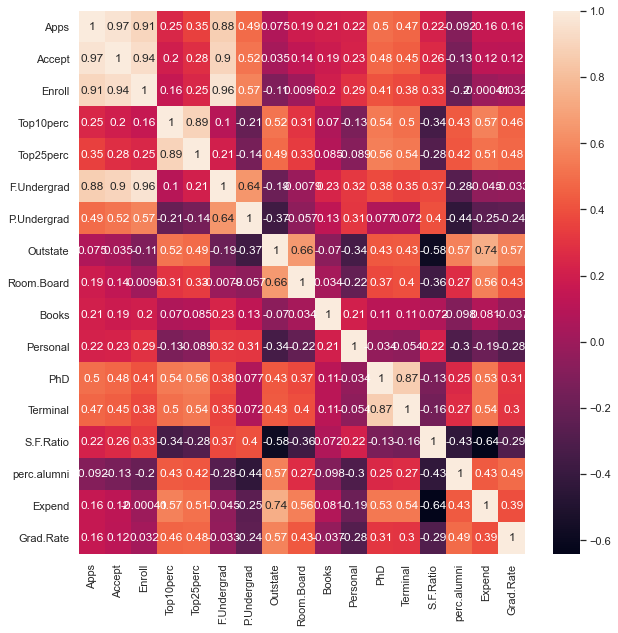

In [423]:
# Print the heatmap of Covariance MAtrix
cov = col_new.cov()
plt.subplots(figsize=(10,10))
sns.heatmap(cov, annot = True)

<AxesSubplot:>

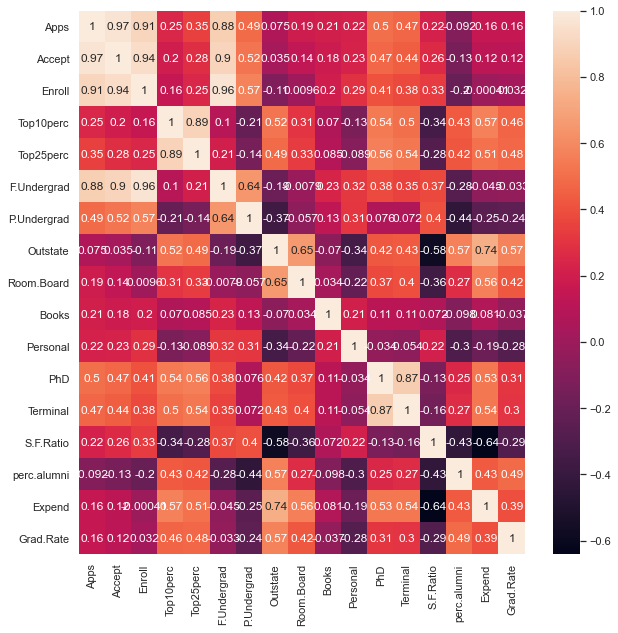

In [424]:
# Print the heatmap of Correlatin matrix
col_cor = col_new.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(col_cor, annot = True)

## 2.4

Text(0.5, 1.0, 'Post Scaling')

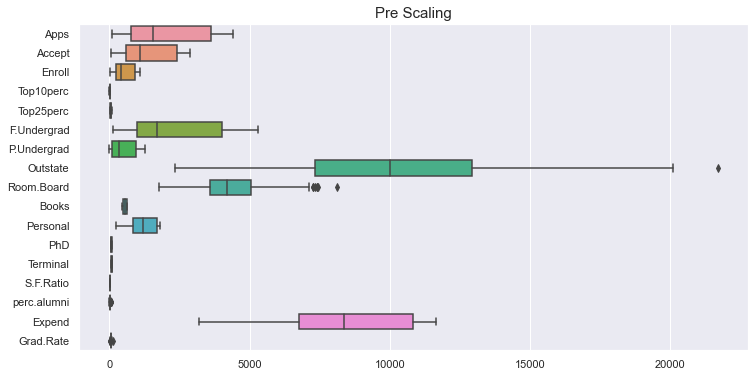

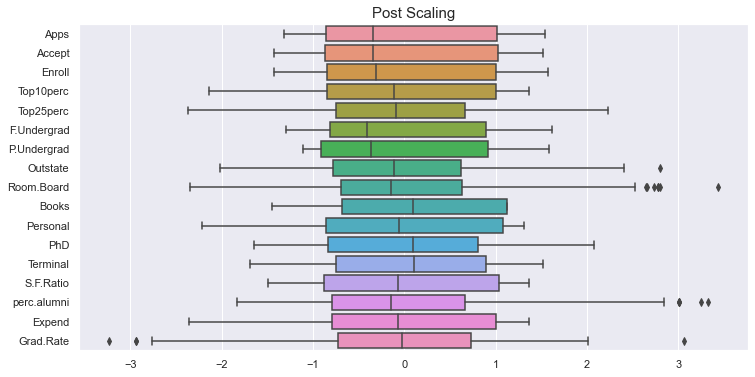

In [425]:
# Plotting boxplots to compare the Pre and Post Scaling database 
plt.figure(figsize=(12,6))
a = sns.boxplot( data = col, orient = 'h')
a.set_title('Pre Scaling', fontsize = 15)

plt.figure(figsize=(12,6))
a = sns.boxplot( data = col_new, orient = 'h')
a.set_title('Post Scaling', fontsize = 15)


## 2.5: Covariance matrix , Eigen Values and Eigen Vec

In [426]:
# Create a Covariance matrix
cov_m =np.cov(col_new.T)
cov_M = pd.DataFrame(cov_m)
cov_M.columns = cov_M.columns +1
cov_M.index = cov_M.index+1
print('The Covariance Matrix is:\n')
cov_M

The Covariance Matrix is:



1         2         3         4         5         6         7  \
1   1.001289  0.966826  0.906590  0.247113  0.350987  0.878353  0.492154   
2   0.966826  1.001289  0.937122  0.202418  0.281799  0.899462  0.520922   
3   0.906590  0.937122  1.001289  0.158052  0.248672  0.962822  0.574912   
4   0.247113  0.202418  0.158052  1.001289  0.893090  0.102414 -0.205942   
5   0.350987  0.281799  0.248672  0.893090  1.001289  0.207256 -0.141305   
6   0.878353  0.899462  0.962822  0.102414  0.207256  1.001289  0.642795   
7   0.492154  0.520922  0.574912 -0.205942 -0.141305  0.642795  1.001289   
8   0.075407  0.035388 -0.113550  0.520970  0.490024 -0.186808 -0.367892   
9   0.189317  0.138178  0.009623  0.305737  0.331917 -0.007917 -0.056670   
10  0.211410  0.185026  0.202719  0.069591  0.085246  0.232339  0.131626   
11  0.219105  0.230586  0.293221 -0.128107 -0.088860  0.317667  0.314114   
12  0.502070  0.475263  0.407671  0.540097  0.564124  0.384590  0.076552   
13  0.470321  0.445513  0.378131  0.501483  0.537894  0.353408  0.072321   
14  0.220698  0.261931  0.332322 -0.343666 -0.283419  0.373052  0.401109   
15 -0.091639 -0.134970 -0.201775  0.433914  0.418403 -0.275779 -0.435710   
16  0.157062  0.122394 -0.000412  0.568516  0.513226 -0.045475 -0.250395   
17  0.158730  0.116039  0.031631  0.464027  0.477896 -0.033216 -0.238084   

           8         9        10        11        12        13        14  \
1   0.075407  0.189317  0.211410  0.219105  0.502070  0.470321  0.220698   
2   0.035388  0.138178  0.185026  0.230586  0.475263  0.445513  0.261931   
3  -0.113550  0.009623  0.202719  0.293221  0.407671  0.378131  0.332322   
4   0.520970  0.305737  0.069591 -0.128107  0.540097  0.501483 -0.343666   
5   0.490024  0.331917  0.085246 -0.088860  0.564124  0.537894 -0.283419   
6  -0.186808 -0.007917  0.232339  0.317667  0.384590  0.353408  0.373052   
7  -0.367892 -0.056670  0.131626  0.314114  0.076552  0.072321  0.401109   
8   1.001289  0.655100 -0.069648 -0.340567  0.425502  0.432691 -0.583813   
9   0.655100  1.001289  0.033994 -0.221006  0.372752  0.396651 -0.360010   
10 -0.069648  0.033994  1.001289  0.207936  0.113555  0.110870  0.072305   
11 -0.340567 -0.221006  0.207936  1.001289 -0.034404 -0.053633  0.215992   
12  0.425502  0.372752  0.113555 -0.034404  1.001289  0.872402 -0.133055   
13  0.432691  0.396651  0.110870 -0.053633  0.872402  1.001289 -0.155294   
14 -0.583813 -0.360010  0.072305  0.215992 -0.133055 -0.155294  1.001289   
15  0.566992  0.272714 -0.097774 -0.304538  0.250710  0.270026 -0.428365   
16  0.740668  0.560003  0.081015 -0.188741  0.533599  0.535985 -0.641855   
17  0.572026  0.425489 -0.037071 -0.277814  0.313770  0.302526 -0.292365   

          15        16        17  
1  -0.091639  0.157062  0.158730  
2  -0.134970  0.122394  0.116039  
3  -0.201775 -0.000412  0.031631  
4   0.433914  0.568516  0.464027  
5   0.418403  0.513226  0.477896  
6  -0.275779 -0.045475 -0.033216  
7  -0.435710 -0.250395 -0.238084  
8   0.566992  0.740668  0.572026  
9   0.272714  0.560003  0.425489  
10 -0.097774  0.081015 -0.037071  
11 -0.304538 -0.188741 -0.277814  
12  0.250710  0.533599  0.313770  
13  0.270026  0.535985  0.302526  
14 -0.428365 -0.641855 -0.292365  
15  1.001289  0.432095  0.491530  
16  0.432095  1.001289  0.392923  
17  0.491530  0.392923  1.001289

In [427]:
# Create Eigen Values & Vectors
eig_vals, eig_vecs = np.linalg.eig(cov_M)

print('\n Eigen Values \n') 
eig_vals


 Eigen Values 



array([5.60423895, 4.86572222, 1.09840145, 1.05111865, 0.83568224,
       0.76166909, 0.5713575 , 0.59493458, 0.43717824, 0.39246486,
       0.24277904, 0.02200926, 0.033692  , 0.18022345, 0.09813084,
       0.10563505, 0.1266698 ])

In [428]:
# Create object 'values' for DataFrame of Eigen Values
values = pd.DataFrame(eig_vals)
values.columns =['Eigen Values']
values.index = values.index +1
values

Eigen Values
1       5.604239
2       4.865722
3       1.098401
4       1.051119
5       0.835682
6       0.761669
7       0.571358
8       0.594935
9       0.437178
10      0.392465
11      0.242779
12      0.022009
13      0.033692
14      0.180223
15      0.098131
16      0.105635
17      0.126670

In [1]:
print('Eigen Vectors \n') 


Eigen Vectors 



In [430]:
vectors = pd.DataFrame(eig_vecs)
vectors.columns = vectors.columns +1
vectors.index = vectors.index +1
vectors

1         2         3         4         5         6         7  \
1   0.264630 -0.319665 -0.120795 -0.018068  0.129654  0.096784 -0.160671   
2   0.245716 -0.338115 -0.147806 -0.021575  0.100804  0.102547 -0.200726   
3   0.203972 -0.373239 -0.094966  0.060956  0.085787  0.105830 -0.195570   
4   0.317937  0.108253  0.223129  0.393664 -0.017317  0.084647  0.224303   
5   0.331960  0.065289  0.187479  0.400659  0.020630  0.081535  0.264541   
6   0.179288 -0.391301 -0.066697  0.022868  0.058950  0.065074 -0.128700   
7   0.007001 -0.345447 -0.116601 -0.225509 -0.040706  0.056870  0.260688   
8   0.285359  0.250589 -0.120408 -0.214088  0.088251  0.104568 -0.019161   
9   0.244985  0.126580 -0.186235 -0.527081  0.153622 -0.009283  0.473421   
10  0.060449 -0.112670  0.655879 -0.222609  0.519032 -0.455437 -0.116613   
11 -0.047115 -0.223290  0.505426 -0.040991 -0.113906  0.567245  0.275562   
12  0.343334 -0.048371  0.058853 -0.004351 -0.415539 -0.316661  0.038772   
13  0.336944 -0.035991  0.047138 -0.050405 -0.430343 -0.342764  0.020118   
14 -0.140690 -0.293413 -0.155231  0.270169  0.066725 -0.413001  0.360843   
15  0.184902  0.258287 -0.063316  0.252134  0.153453  0.027407 -0.372418   
16  0.305092  0.184501  0.147786 -0.297248 -0.127126  0.129129 -0.196594   
17  0.242323  0.154609 -0.247218  0.162034  0.493990  0.040835  0.259507   

           8         9        10        11        12        13        14  \
1  -0.004941  0.144523  0.087793 -0.047849 -0.436147  0.451130  0.038069   
2  -0.002161  0.159841  0.064730  0.037586  0.632552 -0.409862  0.028381   
3  -0.038469  0.071193  0.021706 -0.082654 -0.529896 -0.516404 -0.022182   
4  -0.349632 -0.047820  0.087815  0.097768 -0.025668  0.125417 -0.017416   
5  -0.289944 -0.056326  0.136167 -0.139688  0.063659 -0.158194  0.060966   
6  -0.075254 -0.001932  0.000701 -0.108407  0.348313  0.559150 -0.070543   
7  -0.154223 -0.784088 -0.150558  0.245766 -0.025560 -0.046177  0.099649   
8   0.056463  0.136127  0.146008  0.453614 -0.012727  0.048655  0.698089   
9   0.011862  0.045068  0.406649 -0.378327  0.002091 -0.033686 -0.196375   
10 -0.017890 -0.063308 -0.021020 -0.006833  0.006679 -0.027473  0.087648   
11  0.520296  0.078303  0.030975  0.038228  0.006538  0.004279  0.021596   
12  0.207555  0.023514 -0.167856 -0.044090 -0.006076 -0.035097  0.057984   
13  0.242772 -0.034998 -0.147172 -0.153192 -0.004421  0.019880  0.072567   
14  0.231748  0.173145  0.356800  0.491398 -0.022936  0.006535 -0.180638   
15  0.471126 -0.510538  0.405654 -0.052092  0.020222  0.014743 -0.124967   
16 -0.139396  0.059763 -0.057607  0.517230 -0.029837 -0.008486 -0.608566   
17  0.302095  0.039499 -0.636877  0.026672  0.006473  0.007169 -0.130613   

          15        16        17  
1   0.116930  0.565523  0.035857  
2  -0.127088  0.353748  0.025713  
3  -0.115659 -0.416062 -0.035445  
4  -0.673469  0.043688  0.103454  
5   0.658747  0.013869 -0.143454  
6   0.051263 -0.570557 -0.031061  
7   0.021585  0.091452  0.011197  
8   0.033096 -0.186304 -0.043462  
9  -0.088434 -0.048911  0.055379  
10 -0.007449  0.007636  0.009534  
11 -0.016074 -0.003269 -0.007351  
12  0.115987 -0.046719  0.712623  
13 -0.146792  0.062732 -0.663980  
14  0.040554 -0.038320 -0.054963  
15 -0.021216 -0.010556  0.042921  
16  0.140772 -0.028723 -0.073429  
17 -0.007391 -0.015657 -0.019211

## 2.6

In [349]:
# Formatting the Eigen Vectos matrix in suitable columns and Index
pca_list = ('PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12', 'PCA13', 'PCA14', 'PCA15', 'PCA16', 'PCA17'
)

In [431]:
# Creating a seperate dataframe for listing carious PCA components in the Eigen Vectors
vectors_f = pd.DataFrame(eig_vecs)
vectors_f.columns = list(col_new)
vectors_f.index = list(pca_list)
vectors_f

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
PCA1   0.264630 -0.319665 -0.120795  -0.018068   0.129654     0.096784   
PCA2   0.245716 -0.338115 -0.147806  -0.021575   0.100804     0.102547   
PCA3   0.203972 -0.373239 -0.094966   0.060956   0.085787     0.105830   
PCA4   0.317937  0.108253  0.223129   0.393664  -0.017317     0.084647   
PCA5   0.331960  0.065289  0.187479   0.400659   0.020630     0.081535   
PCA6   0.179288 -0.391301 -0.066697   0.022868   0.058950     0.065074   
PCA7   0.007001 -0.345447 -0.116601  -0.225509  -0.040706     0.056870   
PCA8   0.285359  0.250589 -0.120408  -0.214088   0.088251     0.104568   
PCA9   0.244985  0.126580 -0.186235  -0.527081   0.153622    -0.009283   
PCA10  0.060449 -0.112670  0.655879  -0.222609   0.519032    -0.455437   
PCA11 -0.047115 -0.223290  0.505426  -0.040991  -0.113906     0.567245   
PCA12  0.343334 -0.048371  0.058853  -0.004351  -0.415539    -0.316661   
PCA13  0.336944 -0.035991  0.047138  -0.050405  -0.430343    -0.342764   
PCA14 -0.140690 -0.293413 -0.155231   0.270169   0.066725    -0.413001   
PCA15  0.184902  0.258287 -0.063316   0.252134   0.153453     0.027407   
PCA16  0.305092  0.184501  0.147786  -0.297248  -0.127126     0.129129   
PCA17  0.242323  0.154609 -0.247218   0.162034   0.493990     0.040835   

       P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
PCA1     -0.160671 -0.004941    0.144523  0.087793 -0.047849 -0.436147   
PCA2     -0.200726 -0.002161    0.159841  0.064730  0.037586  0.632552   
PCA3     -0.195570 -0.038469    0.071193  0.021706 -0.082654 -0.529896   
PCA4      0.224303 -0.349632   -0.047820  0.087815  0.097768 -0.025668   
PCA5      0.264541 -0.289944   -0.056326  0.136167 -0.139688  0.063659   
PCA6     -0.128700 -0.075254   -0.001932  0.000701 -0.108407  0.348313   
PCA7      0.260688 -0.154223   -0.784088 -0.150558  0.245766 -0.025560   
PCA8     -0.019161  0.056463    0.136127  0.146008  0.453614 -0.012727   
PCA9      0.473421  0.011862    0.045068  0.406649 -0.378327  0.002091   
PCA10    -0.116613 -0.017890   -0.063308 -0.021020 -0.006833  0.006679   
PCA11     0.275562  0.520296    0.078303  0.030975  0.038228  0.006538   
PCA12     0.038772  0.207555    0.023514 -0.167856 -0.044090 -0.006076   
PCA13     0.020118  0.242772   -0.034998 -0.147172 -0.153192 -0.004421   
PCA14     0.360843  0.231748    0.173145  0.356800  0.491398 -0.022936   
PCA15    -0.372418  0.471126   -0.510538  0.405654 -0.052092  0.020222   
PCA16    -0.196594 -0.139396    0.059763 -0.057607  0.517230 -0.029837   
PCA17     0.259507  0.302095    0.039499 -0.636877  0.026672  0.006473   

       Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
PCA1   0.451130   0.038069     0.116930  0.565523   0.035857  
PCA2  -0.409862   0.028381    -0.127088  0.353748   0.025713  
PCA3  -0.516404  -0.022182    -0.115659 -0.416062  -0.035445  
PCA4   0.125417  -0.017416    -0.673469  0.043688   0.103454  
PCA5  -0.158194   0.060966     0.658747  0.013869  -0.143454  
PCA6   0.559150  -0.070543     0.051263 -0.570557  -0.031061  
PCA7  -0.046177   0.099649     0.021585  0.091452   0.011197  
PCA8   0.048655   0.698089     0.033096 -0.186304  -0.043462  
PCA9  -0.033686  -0.196375    -0.088434 -0.048911   0.055379  
PCA10 -0.027473   0.087648    -0.007449  0.007636   0.009534  
PCA11  0.004279   0.021596    -0.016074 -0.003269  -0.007351  
PCA12 -0.035097   0.057984     0.115987 -0.046719   0.712623  
PCA13  0.019880   0.072567    -0.146792  0.062732  -0.663980  
PCA14  0.006535  -0.180638     0.040554 -0.038320  -0.054963  
PCA15  0.014743  -0.124967    -0.021216 -0.010556   0.042921  
PCA16 -0.008486  -0.608566     0.140772 -0.028723  -0.073429  
PCA17  0.007169  -0.130613    -0.007391 -0.015657  -0.019211

## 2.7

In [432]:
# Sort the values, and calculate the % Explained by each eigen value
var = pd.DataFrame(sorted(eig_vals*100, reverse = True)/tot_var)
var.columns = ['% Explained']
var.index = var.index+1

var['Scree Value'] = var['% Explained'].cumsum()
var

% Explained  Scree Value
1     32.923684    32.923684
2     28.585059    61.508743
3      6.452869    67.961612
4      6.175093    74.136706
5      4.909451    79.046157
6      4.474640    83.520797
7      3.495111    87.015908
8      3.356601    90.372509
9      2.568327    92.940836
10     2.305646    95.246482
11     1.426274    96.672756
12     1.058774    97.731529
13     0.744158    98.475687
14     0.620583    99.096270
15     0.576497    99.672767
16     0.197933    99.870700
17     0.129300   100.000000

Text(0, 0.5, '% Explained')

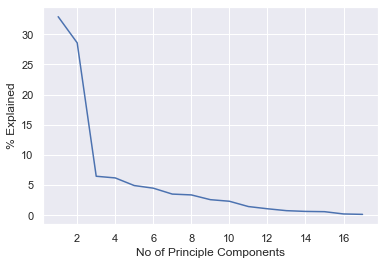

In [433]:
#Create a Plot 
plt.plot(var['% Explained'])
plt.xlabel('No of Principle Components')
plt.ylabel('% Explained')

In [ ]:
#Create a Plot Cumulative Variance
plt.plot(var['Scree Value'])
plt.xlabel('No of Principle Components')
plt.ylabel('Cumulative %Explained')

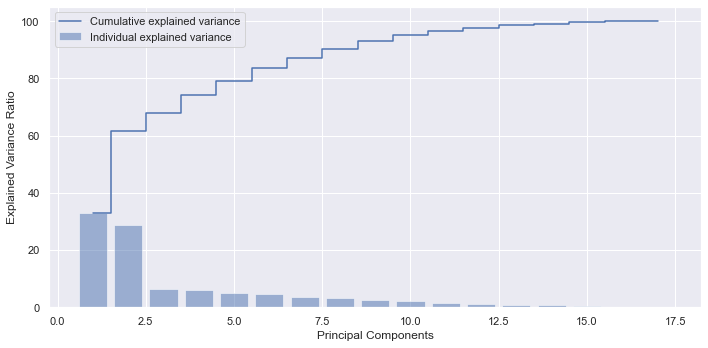

In [434]:
# Plotting of Screeplot
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var['% Explained'] , alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), var['Scree Value'], where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

## 2.8

In [435]:
# Perform PCA for 4 dimensions.
from sklearn.decomposition import PCA

# Note: We are generating only 4 PCA dimentions (reduction from 17 to 4)
pca = PCA(n_components = 4)
data_reduced = pca.fit_transform(col_new)
data_reduced.transpose()


array([[-1.46586632, -0.9062011 , -1.65748222, ..., -0.19857841,
         6.02271565, -0.25554595],
       [ 1.36767323,  0.5454283 , -1.50532191, ...,  0.42434818,
        -0.39189604,  1.77280057],
       [ 0.28237881, -0.18575057,  0.67097148, ..., -0.72513958,
        -0.94603027,  1.35106765],
       [-1.16680017,  3.12242939, -0.5317935 , ..., -0.61220101,
         0.1609627 , -2.10443316]])

In [403]:
pca_index = ('PCA1', 'PCA2', 'PCA3', 'PCA4')
pca_index

('PCA1', 'PCA2', 'PCA3', 'PCA4')

In [437]:
pca.components_

array([[ 0.2646302 ,  0.24571638,  0.20397164,  0.31793696,  0.33196037,
         0.17928822,  0.00700111,  0.28535922,  0.24498509,  0.06044879,
        -0.04711506,  0.34333426,  0.33694412, -0.14069048,  0.18490231,
         0.3050916 ,  0.24232258],
       [ 0.31966465,  0.33811498,  0.37323904, -0.10825292, -0.06528893,
         0.39130106,  0.34544678, -0.25058944, -0.1265803 ,  0.11266965,
         0.2232899 ,  0.04837139,  0.03599124,  0.29341336, -0.2582873 ,
        -0.1845014 , -0.15460895],
       [ 0.12079465,  0.14780638,  0.09496588, -0.22312875, -0.18747936,
         0.06669649,  0.11660111,  0.12040829,  0.1862353 , -0.65587947,
        -0.5054263 , -0.05885291, -0.04713782,  0.15523075,  0.06331625,
        -0.14778613,  0.24721841],
       [ 0.0180664 ,  0.02157419, -0.06095457, -0.39366365, -0.40065914,
        -0.0228665 ,  0.22550875,  0.21408856,  0.52708081,  0.22260866,
         0.04099098,  0.00434977,  0.0504062 , -0.27016892, -0.25213389,
         0.29724784

In [438]:
# Convert to df
col_final = pd.DataFrame(pca.components_, columns = list(col_new))
col_final.index = pca_index
col_final

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
PCA1  0.264630  0.245716  0.203972   0.317937   0.331960     0.179288   
PCA2  0.319665  0.338115  0.373239  -0.108253  -0.065289     0.391301   
PCA3  0.120795  0.147806  0.094966  -0.223129  -0.187479     0.066696   
PCA4  0.018066  0.021574 -0.060955  -0.393664  -0.400659    -0.022866   

      P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
PCA1     0.007001  0.285359    0.244985  0.060449 -0.047115  0.343334   
PCA2     0.345447 -0.250589   -0.126580  0.112670  0.223290  0.048371   
PCA3     0.116601  0.120408    0.186235 -0.655879 -0.505426 -0.058853   
PCA4     0.225509  0.214089    0.527081  0.222609  0.040991  0.004350   

      Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
PCA1  0.336944  -0.140690     0.184902  0.305092   0.242323  
PCA2  0.035991   0.293413    -0.258287 -0.184501  -0.154609  
PCA3 -0.047138   0.155231     0.063316 -0.147786   0.247218  
PCA4  0.050406  -0.270169    -0.252134  0.297248  -0.162034

In [439]:
# export the data of the Principal Component scores into a data frame

col_final.to_csv('Data_Reduced.csv',index= False)

<AxesSubplot:>

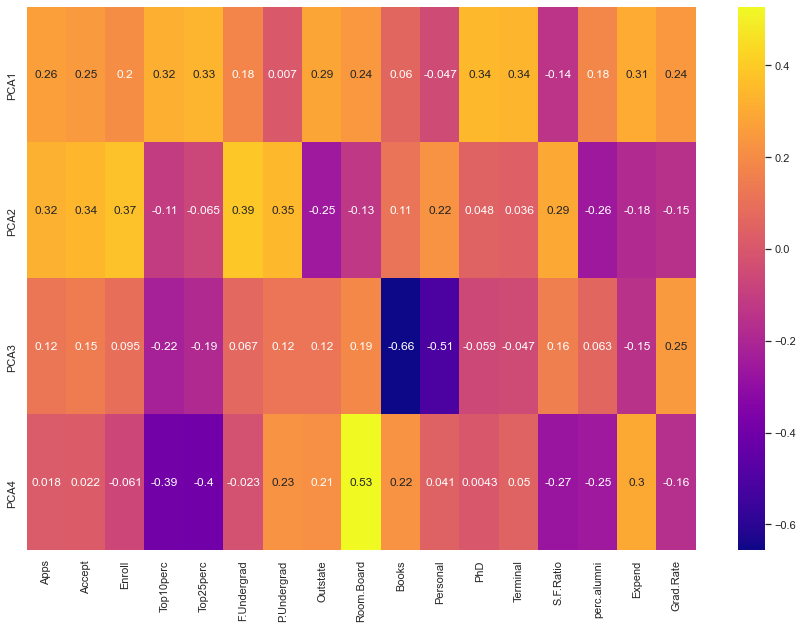

In [440]:
plt.figure(figsize=(15,10))
sns.heatmap(col_final, cmap = 'plasma', annot = True)